# Model Description

This model is based on work by Guanella et al. 2007. For more details, see the reference:

Guanella, A., Kiper, D. & Verschure, P. A model of grid cells based on a twisted torus topology. Int. J. Neural Syst. 17, 231–240 (2007). 

## Activity and Stabilization
A set of $N$ comodular grid cells's activity is modeled. The activity of neuron $i$ at time $t$ is given by the following:

\begin{gather}
A_i(t) = B_i(t) + \tau\bigg(\frac{B_i(t)} {{<B_j(t-1)>}_{j=1}^{N}} - B_i(t)\bigg),
\end{gather}

where $\tau$ represents a stabilization factor, ${< \space .\space>}_{j=1}^{N}$ is the mean over cells in the network, and $B_i(t)$ is a linear transfer function defined as follows:

\begin{gather}
B_i(t) = A_i(t-1) + \sum_{j=1}^{N}A_j(t-1)w_{ji}(t-1),
\end{gather}

where $w_{ji}(t-1)$ is the weight from cell $j$ to cell $i$ at time $t-1$, with $i,j \in \{1, 2, ..., N \}$.

Neurons are initialized with random activity uniformly between $0$ and $1/\sqrt N$

## Attractor Dynamics
When the agent is stationary, the weight between neuron $i$ and $j$ is defined as follows:

\begin{gather}
w_{ij} = I \exp \bigg(- \frac{||c_i - c_j||^2_{tri}} {\sigma^2}\bigg) - T
\end{gather}

The weight is dependent on the relative "positions" of cells $i$ and $j$. The position of neuron $i$ is defined as ${c_i}$ $= (c_{i_{x}}\space ,\space c_{i_{y}})$, $ c_{i_{x}} = (i_x− 0.5)/N_x $, $ c_{i_{y}} = \frac{\sqrt3}{2} (i_y− 0.5)/N_y$ with $i_x \in \{1, 2, ..., N_x\}$ and $i_y \in \{1, 2, ..., N_y\}$, and where $N_x$ and $N_y$ are the number of columns and rows
in the cells matrix and $i_x$ and $i_y$ the column and the row numbers of cell $i$. 

Additionally, global parameters that govern the relationship between all pairs of cells include $I$, the intensity parameter, $\sigma$ the size of the Gaussian, $T$ the shift parameter (see the referenced paper for more details).

Finally, the key to getting triangular grid instead of square ones is to use a distance metric defined as follows: 
$\text{dist}_{tri}({c_i}$ $, $ $ c_j$ $)$ := $\| c_i− c_j \|_{tri} = \text{min}_{k=1}^7 \| c_i $ $− \space  c_j$ $+  \space s_k\|$, 

where

$s_1 := (0, 0)$

$s_2 := (−0.5, \frac{\sqrt3}{2})$

$s_3 := (−0.5, -\frac{\sqrt3}{2})$

$s_4 := (0.5, \frac{\sqrt3}{2})$

$s_5 := (0.5, -\frac{\sqrt3}{2})$

$s_6 := (−1, 0)$

$s_7 := (1, 0)$

and where $\| \space . \space \|$ is the Euclidean norm.

## Modulation
When the agent is moving, the weight between neurons $i$ and $j$ becomes modulated by the velocity $v := (v_x, v_y)$. In essence, the synaptic connections of the network shift in the direction of the agent. This modulation is expressed as follows:
\begin{gather}
w_{ij}(t) =  I \exp \bigg(- \frac{\|c_i - c_j+ \alpha R_{\beta}v(t-1)\|^2_{tri}} {\sigma^2}\bigg) - T
\end{gather}

The scale and orientation of the grid is dictated by the gain factor $\alpha \in \mathbb{R}^+$ and bias $\beta \in [0, π/3]$. The input of the network is thus modulated and biased by the gain and the bias parameters, with $v \longmapsto \alpha R_{\beta}v$ , where $R_{\beta}$ is the rotation matrix of angle $\beta$ defined by
\begin{gather}
R_{\beta} = \begin{bmatrix}
\cos(\beta) & -\sin(\beta) \\
\sin(β) & cos(β)\end{bmatrix}
\end{gather}

## Modifications
This model is modified in two key ways from the model described in Guanella et al 2007. The first modification allows for added heading direction noise at each timestep, and the second introduces landmark inputs to the grid cell network. Heading direction noise is added as $\beta_{\text{noisy}}(t) = \beta + \sigma_{\beta} r(t)$, where $\beta$ is the unmodified bias, $\sigma_{\beta}$ regulates the extent of noise, and $r(t)$ is drawn from the standard normal distribution, and $\beta_{\text{noisy}}(t)$ is still constrained such that $\beta_{\text{noisy}}(t) \in [0, π/3]$ The rotation matrix is then calculated using $\beta_{\text{noisy}}(t)$.

Landmark inputs are added with the addition of landmark cells and their unidirectional excitatory synaptic connections to grid cells. When landmarks are present, each landmark $L_{l}$ is associated with its own dedicated landmark cell population. A given landmark cell's activity $A_{L_{l_m}}$ is dependent on the agent's proximity to the landmark's position, where $l \in \{1, ..., N_L\}$ and where $N_L$ is the number of landmarks present and $m \in \{1, ..., N_{Ln}\}$ where $N_{Ln}$ is a global parameter setting the number of landmark cells dedicated to any given landmark. The activity of landmark cell $A_{L_{l_m}}$ is defined as

\begin{gather}
A_{L_{l_m}} = \begin{cases} 
\alpha_{L_l} \exp \bigg(- \frac{\|p(t) - p_{L_l}\|^2} {\big(\frac{1}{2} q_{L_l}\big)^2} \bigg) &  \text{if} \space ||p(t) - p_{L_l}|| \leq q_{L_l} \\
0 & \text{otherwise},
\end{cases}
\end{gather}

where the strength of landmark $L_l$ is governed by $\alpha_{L_l} \in \mathbb{R}^+$, $p(t):= (p_x(t), p_y(t))$ is the position of the agent at time $t$, $p_{L_l} := (p_{L_{l_x}}, p_{L_{l_y}})$ is the position of $L_l$, and $q_{L_l} \in \mathbb{R}^+$ represents the lookahead distance at which landmark $L_l$ begins recruiting the activity of its landmark cells. To incorporate input from landmark cells, the linear transfer function is modified as follows:

\begin{gather}
B_i(t) = A_i(t-1) + \sum_{j=1}^{N}A_j(t-1)w_{ji}(t-1) + \sum_{l=1}^{N_{L}} \sum_{m=1}^{N_{Ln}} A_{L_{l_m}}(t-1) w_{l_m i}(t-1)
\end{gather}

where $w_{l_mi}$ is the weight from landmark cell $m$, which responds to landmark $l$, to grid cell $i$.

A model containing a Hebbian plasticity term between landmark cells and grid cells makes the following modifications:
1. The weight between each landmark cell and the $N$ grid cells is initialized randomly with values between $0$ and $1/\sqrt N$
2. Hebbian plasticity allows changes in weights between landmark cells and grid cells as follows:

$w_{l_mi}(t) = w_{l_mi}(t-1) + \alpha_{\text{hebb}} (A_i(t-1) A_{L_{m_i}}(t-1)) - \alpha_{\text{decay}}$

where $ \alpha_{\text{hebb}}$ regulates the extent of Hebbian potentiation and $ \alpha_{\text{decay}}$ provides a constant decay factor. Weight values are constrained to be between some minimum $W_{L_{\text{min}}}$ and maximum $W_{L_{\text{max}}}$

# Install TTGC

In [ ]:
# !pip install ttgc

In [2]:
from ttgc import *
import numpy as np
from scipy.ndimage import gaussian_filter1d
import csv
import GPUtil

import urllib.request
from pathlib import Path

from matplotlib import pyplot as plt
plt.rcParams["image.cmap"] = "magma"
%config InlineBackend.figure_format = 'retina'

In [3]:
# Get the current working directory and check if the example dataset exists
file_name = "open_field.txt"
file_path = Path.cwd().joinpath(file_name)

if not file_path.exists():
    data_url = 'https://github.com/johnhwen1/ttgc/tree/main/examples/open_field.txt'
    urllib.request.urlretrieve(data_url, filename=file_name)

In [4]:
data = []
with open(file_path, newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        data.append(row)
        
csvfile.close()
data=np.array(data)
pos_str = data[100:,7:9]

C:\Users\johnh\.conda\envs\test_env\Lib\site-packages\numpy\_core\_methods.py:48: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
C:\Users\johnh\.conda\envs\test_env\Lib\site-packages\numpy\_core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


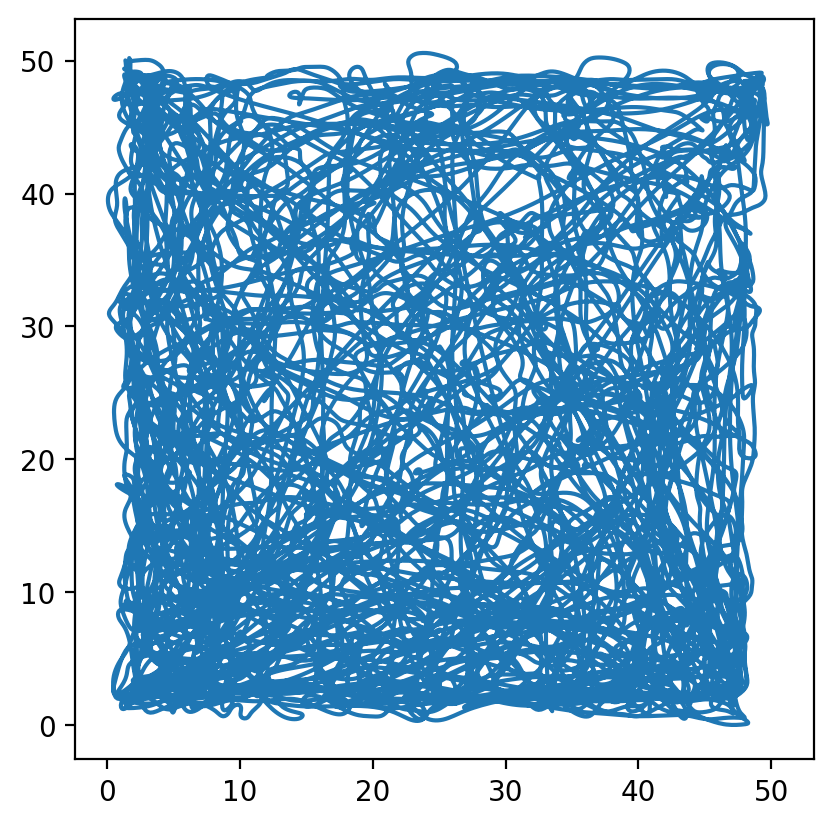

In [5]:
pos = helpers.str_to_float(pos_str)
norm_pos=(pos - pos.min(0)) / (pos.max(0)-pos.min(0))
pos = (norm_pos * 50).astype(float)

vel2d = np.diff(pos, axis=0)
speed = np.sqrt((np.power(vel2d[:,0], 2) + np.power(vel2d[:,1],2)).astype(float))
bins_moving = np.where(speed > 0.1)[0]

start_bin=15000
pos_moving = pos[bins_moving[start_bin:start_bin+50001],:]
vel2d = gaussian_filter1d(np.diff(pos_moving, axis=0).astype(float), 2, axis=0)
this_pos = pos_moving[0,:] + np.cumsum(vel2d, axis=0)
plt.plot(this_pos[:,0], this_pos[:,1])
_ = plt.axis('square')

In [12]:
if len(GPUtil.getAvailable())>1:
    import torch
    torch.cuda.is_available()